<a href="https://colab.research.google.com/github/lmeneses7/Prediccion_Ingresos/blob/main/Examen_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instrucciones

**El examen puede ser realizado en grupo de tres personas, sin embargo, cada integrante crear y ejecutar las tareas de actualización en su GitHub.**

A continuación, se encuentran las instrucciones para el desarrollo del examen de nuestro curso de Ciencias de Datos para la Economía, el cual es parte de su portfolio.

**Objetivo**: Que el/la estudiante utilice las herramientas de Git y posteriormente publicar su primer proyecto de ciencias de datos en GitHub.

A continuación encontrará el dataset **ingresos.txt** en la carpeta de **Datos**, el cual contiene información de variables que buscan predecir los ingresos anuales de los encuestados utilizando datos de encuestas de 1990.

El dataset tiene 1.816 filas y 14 columnas. A continuación se describen las columnas:

- estatura: Unidad de medida centímetros
- peso: Unidad de medida kilogramos
- genero
- ingresos: en dólares
- etnia: etnia en EE.UU.
- educacion: en años
- educacion_madre: en años
- educacion_padre: en años
- Camina: Camina al trabajo
  - 1: Nunca
  - 2: Una vez al mes o menos
  - 3: Alrededor de dos veces al mes
  - 4: Alrededor de una veces a la semana
  - 5: Dos veces a la semana
  - 6: Tres veces a la semana
  - 7: Mas de tres veces a la semana
  - 8: Todos los días
- ejercicio: días de la semana que practica ejercicios
- fumador: Fuma 7 cigarros o más a la semana
  - 1: Si
  - 2: No
- tenso: días de la semana en dicho estado
- malhumorado: : días de la semana en dicho estado
- edad: en años



**Tareas solicitadas:**

Con el set de datos  ingresos.txt, debe realizar las siguientes actividades tanto en Python, Git y GitHub.:

- Crear carpeta donde va a trabajar su proyecto


- Inicializar su proyecto en git

  **`git init`**

- Crear un cuaderno de jupyter notebook, ya sea en colab o en su computador, para realizar su actividad.


- Crear un archivo con nombre README.md
touch README.md

- Describa su proyecto en el archivo README.md utilizando lenguaje markdown o latex. Puede usar como ayuda gráfica la página web indicada en las slices vistas en clase.

- Realizar un análisis descriptivos y visualización de datos: Debe realizar tareas tales como, descripción de los datos, transformaciones en caso de ser necesario, imputación, entro otras.
Debe guardar su proyecto y agregar el archivo a Git y comentarlo.

  **`crt + s`**

  **`git add`**

  **`git commit`**

- Crear un repositorio remoto en GitHub con el nombre Ciencias de Datos:

- Conectarse desde su computador al repositorio remoto. No olvide enlazar su computador.
git remote add origin https://github.com/nombre_usuario/nombre_repositorio.git

  Otra alternativa es realizar el proyecto usanod colab.

- Crear rama principal en su computador

  **`git branch -M main`**

- Agregar cuaderno de jupyter a repositorio remoto

  **`git push -u origin main`**

- Crear nueva rama para la segunda parte del Proyecto.

  **`git branch`**

- Moverse a nueva rama para la segunda parte del Proyecto.

  **`git checkout`**

- Continuar con su tarea en jupyter notebook. Ahora deberá aplicar reducción de dimensionalidad usando el algoritmo PCA. No es necesario que realice los test estadístico, solamente explicarlos e indicar que se cumplen los supuestos.
Debe guardar su proyecto y agregar el archivo a Git y comentarlo.

  **`crt + s`**

  **`git add`**

  **`git commit`**

- Moverse a la rama principal y realizar merge a la rama creada.

  **`git merge`**

- Actualizar la rama principal de su repositorio remoto y agregar la rama creada

  **`git push origin main`**

  **`git push origin nombre_rama_2`**


- Finalmente, cada integrante debe agregar la url de su proyecto en el aulavirtual

**Fecha Entrega: Domingo 15 de Diciembre de 2024, 23:00 hrs.**


**Nota 1:** Los códigos y pasos indicados deben ser utilizados como referencia, ya que es posible que algún paso o comandos no se hayan indicado.

**Nota 2**: En caso de que no pueda generar el proyecto con las ramas solicitadas, puede cargar el proyecto con un solo push.

# **Librerias y Datos**

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

SyntaxError: invalid syntax (<ipython-input-41-38a6680d7e1a>, line 8)

In [3]:
from google.colab import files


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
data = pd.read_csv('/content/drive/MyDrive/Ciencia de Datos para Economía/ingresos-1.txt', sep='\t')
data = data.dropna() #quitamos las observaciones con valores nulos.


In [33]:
#Convertiremos la columna "genero" en valores dummy
data['genero'] = data['genero'].replace({'masculino': 1, 'femenino': 0})
data['etnia'] = data['etnia'].replace({'Blanco': 1, 'Other': 0, 'Afroamericano':3, 'Latino':4})

print(data['etnia'].unique())

[1 0 2 3]


<ipython-input-33-1e816ca0530b>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['genero'] = data['genero'].replace({'masculino': 1, 'femenino': 0})


# **Estadística Descriptiva**

In [8]:
#@title Estadística Descriptiva
print(data.head())
print(data.info())
print(data.describe())

   estatura   peso     genero  ingresos   etnia  educacion  educacion_madre  \
0    187.96  95.25  masculino   50000.0  Blanco       16.0             16.0   
1    167.64  56.70   femenino   60000.0  Blanco       16.0             16.0   
2    162.56  57.15   femenino   30000.0  Blanco       16.0             16.0   
3    165.10  90.72   femenino   25000.0  Blanco       17.0             17.0   
4    160.02  49.90   femenino   50000.0   Other       16.0             16.0   

   educacion_padre  camina  ejercicio  fumador  tenso  malhumorado  edad  
0             16.0       3          3      2.0    0.0          0.0    45  
1             16.0       6          5      1.0    0.0          0.0    58  
2             16.0       8          1      2.0    1.0          1.0    29  
3              NaN       8          1      2.0    0.0          0.0    57  
4             16.0       5          6      2.0    0.0          0.0    91  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
D

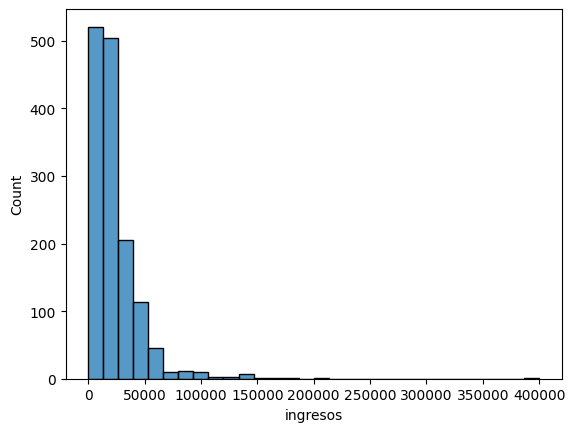

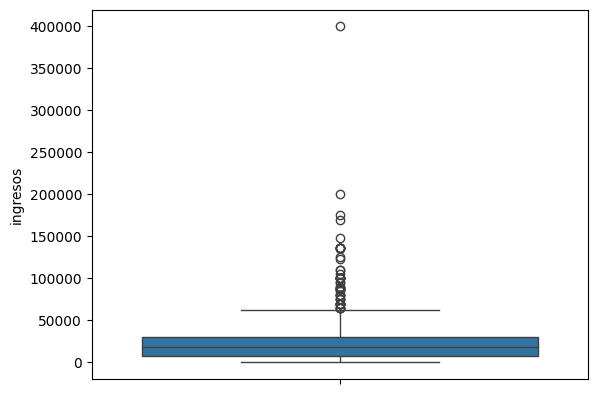

In [22]:
#@title Gráficos

# Histograma de una variable
sns.histplot(data['ingresos'], bins=30)
plt.show()

# Boxplot para detectar outliers
sns.boxplot(data['ingresos'])
plt.show()

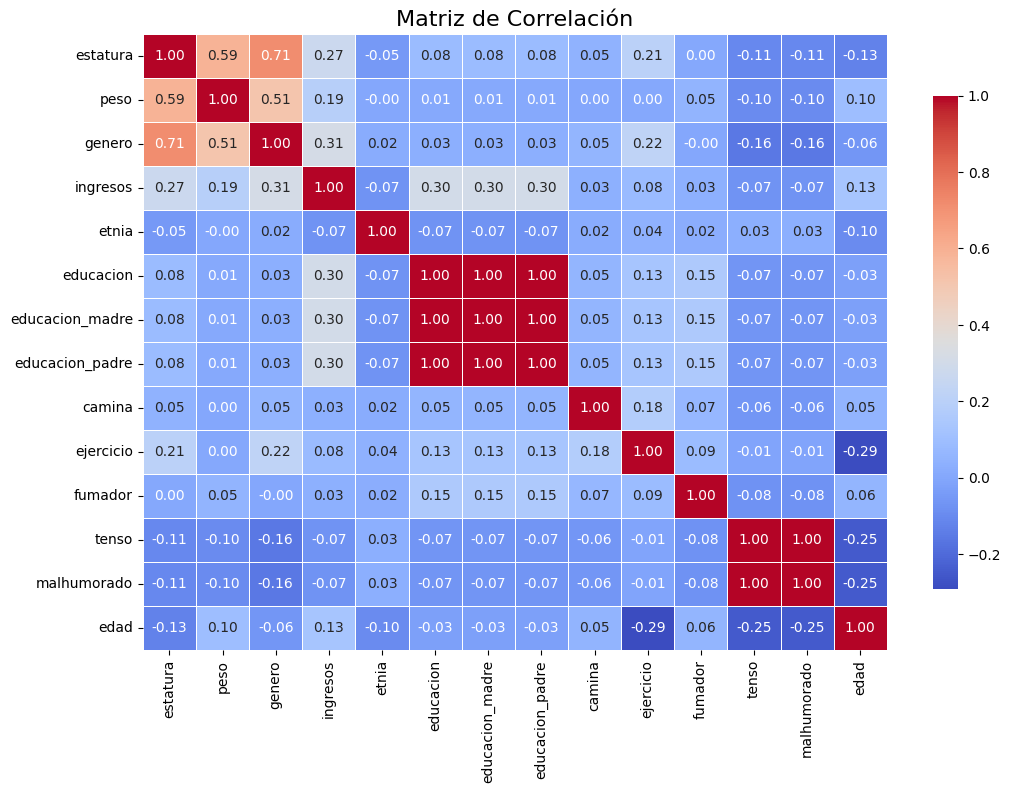

In [36]:
#@title Correlaciones
# Crear la matriz de correlación
correlation_matrix = data.corr()

#configuramos el tamaño del gráfico
plt.figure(figsize=(12, 8))

#Realizamos el heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"shrink": 0.8},
    linewidths=0.5
)
plt.title("Matriz de Correlación", fontsize=16)
plt.show()


# **Reducción de Dimensionalidad**

In [37]:
#@title Analísis PCA
#Seleccionamos las columnas númericas.
features = ['estatura', 'peso', 'genero', 'ingresos', 'educacion',
            'educacion_madre', 'educacion_padre', 'camina',
            'ejercicio', 'fumador', 'tenso', 'malhumorado', 'edad']

#Escalamiento de los datos
scaler = StandardScaler()
x = scaler.fit_transform(data[features])
print(x[:5])

[[ 1.94068318  1.61116121  1.2833779   1.15880458  0.97967774  0.97967774
   0.97967774 -0.91485501 -0.10397244  0.57735027 -0.67117039 -0.67117039
   0.26035844]
 [-0.17662625 -0.87904949 -0.77919372  1.57799571  0.97967774  0.97967774
   0.97967774  0.25408129  0.75402359 -1.73205081 -0.67117039 -0.67117039
   1.07051635]
 [-0.7059536  -0.84998088 -0.77919372  0.32042231  0.97967774  0.97967774
   0.97967774  1.03337216 -0.96196846  0.57735027 -0.20313874 -0.20313874
  -0.73675899]
 [-0.97061728 -1.31830845 -0.77919372  1.15880458  0.97967774  0.97967774
   0.97967774 -0.13556414  1.1830216   0.57735027 -0.67117039 -0.67117039
   3.12707104]
 [ 0.35270111  0.29273837 -0.77919372  1.66183394  1.82266307  1.82266307
   1.82266307 -1.69414587 -0.96196846  0.57735027  0.26489292  0.26489292
   0.82123699]]


In [38]:
# Aplicar PCA para reducir a 2 componentes principales
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Verificar los nuevos datos
print(pca_df.head())

        PC1       PC2
0  2.829540  1.907733
1  1.715340 -0.668455
2  1.220820 -1.647710
3  1.714528 -1.058379
4  2.901897 -1.473387


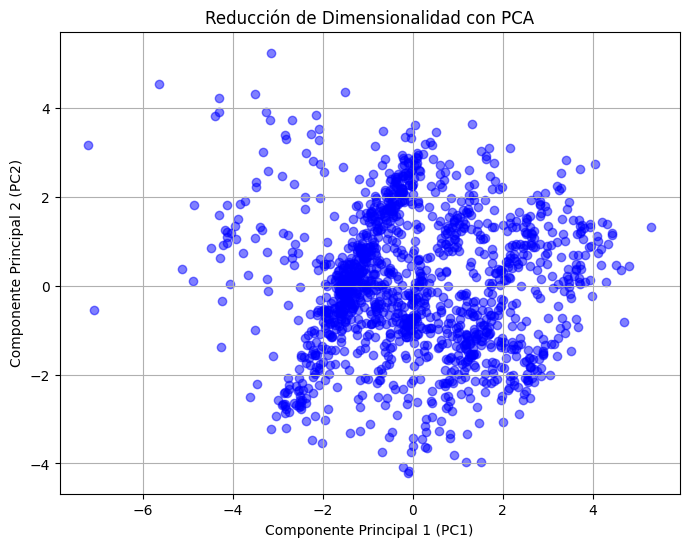

In [39]:
# Graficar los componentes principales
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue', alpha=0.5)
plt.title('Reducción de Dimensionalidad con PCA')
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')
plt.grid()
plt.show()

In [40]:
# Porcentaje de varianza explicada por cada componente
print("Varianza explicada por componente:", pca.explained_variance_ratio_)
print("Varianza total explicada:", sum(pca.explained_variance_ratio_))


Varianza explicada por componente: [0.25636439 0.18604158]
Varianza total explicada: 0.4424059606438602


## Supuestos del PCA y su verificación

### 1. Linealidad

PCA asume que las variables tienen **relaciones lineales entre sí**. Esto significa que las combinaciones lineales de las variables originales pueden explicar la varianza en los datos.

En este caso:

- Las variables seleccionadas (`estatura`, `peso`, `educacion`, `edad`, etc.) son numéricas y tienen relaciones lineales entre sí.
- La **matriz de correlación** generada previamente muestra coeficientes de correlación positivos y negativos, lo cual confirma que existen relaciones lineales.

---

### 2. Datos numéricos

PCA solo trabaja con **datos numéricos**. Las variables categóricas deben transformarse antes de aplicar PCA.

En este caso:

- La columna `genero` fue transformada a valores binarios:
   - `Masculino` → `1`, `Femenino` → `0`.
- La columna `etnia` fue codificada numéricamente:
   - `Blanco` → `1`, `Other` → `0`, `Afroamericano` → `3`, `Latino` → `4`.

Por lo tanto, todas las columnas utilizadas en el análisis PCA son numéricas.

---

### 3. Varianza máxima

PCA busca capturar la **máxima varianza** en los datos, por lo que es importante que las variables sean **escaladas** a la misma escala.

En este caso:

- Se utilizó `StandardScaler` para escalar las variables antes de aplicar PCA.
- El escalamiento asegura que todas las variables tengan **media 0** y **desviación estándar 1**, eliminando la influencia de las unidades o magnitudes originales.

El escalamiento previo garantiza que la varianza capturada por PCA no se vea afectada por las diferencias en la escala de las variables.

---

### 4. Independencia de componentes

PCA genera **componentes principales ortogonales**, es decir, linealmente **independientes** entre sí. Cada componente captura información única de los datos.

En este caso:

- Los componentes principales PC1 y PC2 tienen varianzas explicadas **separadas**:
   - PC1 explica el **25.63%** de la varianza total.
   - PC2 explica el **18.60%** de la varianza total.
- La independencia entre componentes está garantizada por la naturaleza misma del algoritmo PCA.

---

### 5. Escalamiento

El **escalamiento** de las variables es un requisito fundamental para PCA, ya que permite que todas las variables tengan la **misma importancia** en el análisis.

En este caso:

- Se aplicó `StandardScaler` para realizar el escalamiento previo a PCA.
- El resultado muestra que los datos están **centrados en 0** y tienen una **desviación estándar de 1**, cumpliendo con el requisito de escalamiento.

---
